In [59]:
import requests
import zipfile
import os
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback

In [2]:
# import requests
# url = 'https://storage.googleapis.com/platzi-tf2/sign-language-img.zip'

# response = requests.get(url)
# with open('data/sign_language_img.zip', 'wb') as f:
#     f.write(response.content)

In [3]:
# # En donde tenemos el archivo local?
# local_zip = 'data/sign_language_img.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# # En donde lo vamos a extraer? como se llamará la carpeta?
# zip_ref.extractall('data/sign_language_img')
# zip_ref.close()

# # Esto es opcional, pero yo prefiero eliminar el archivo zip
# os.remove(local_zip)

In [4]:
train_dir = 'data/sign_language_img/Train'
test_dir = 'data/sign_language_img/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [17]:
# Básicamente me crea una lista del abecedario exceptuando las que puse
clases = [char for char in string.ascii_uppercase if char!='J' if char != 'Z']

In [25]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

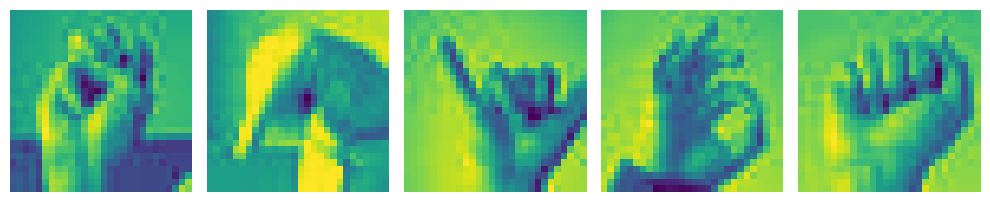

In [30]:
# Un generador siempre se usa con next
sample_training_images,_ = next(train_generator)
plotImages(sample_training_images[:5])

In [38]:
model_base = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_base.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
model_base.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
hist = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20


d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 234s 913ms/step - accuracy: 0.2164 - loss: 2.6896 - val_accuracy: 0.4421 - val_loss: 1.6996
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.5970 - loss: 1.3390 - val_accuracy: 0.6028 - val_loss: 1.3048
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.7158 - loss: 0.9430 - val_accuracy: 0.6288 - val_loss: 1.2294
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7882 - loss: 0.7119 - val_accuracy: 0.6533 - val_loss: 1.1090
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8319 - loss: 0.5589 - val_accuracy: 0.6604 - val_loss: 1.0562
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.8776 - loss: 0.4263 - val_accuracy: 0.6898 - val_loss: 1.0346
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9147 - loss: 0.3147 - val_accuracy: 0.7312 - val_loss: 0.9166
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.9388 - loss: 0.2417 - val_accur

In [41]:
model_base.evaluate(test_generator)

 2/57 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6719 - loss: 1.7949

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 802ms/step - accuracy: 0.7447 - loss: 1.2721


[1.2058720588684082, 0.749023973941803]

In [42]:
def visualizacion_resultados(hist):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    
    ax[0].plot(epochs, train_acc, 'go-', label='Train accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Val accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    
    ax[1].plot(epochs, train_loss, 'g*-', label='Train loss')
    ax[1].plot(epochs, val_loss, 'r*-', label='Val loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")   

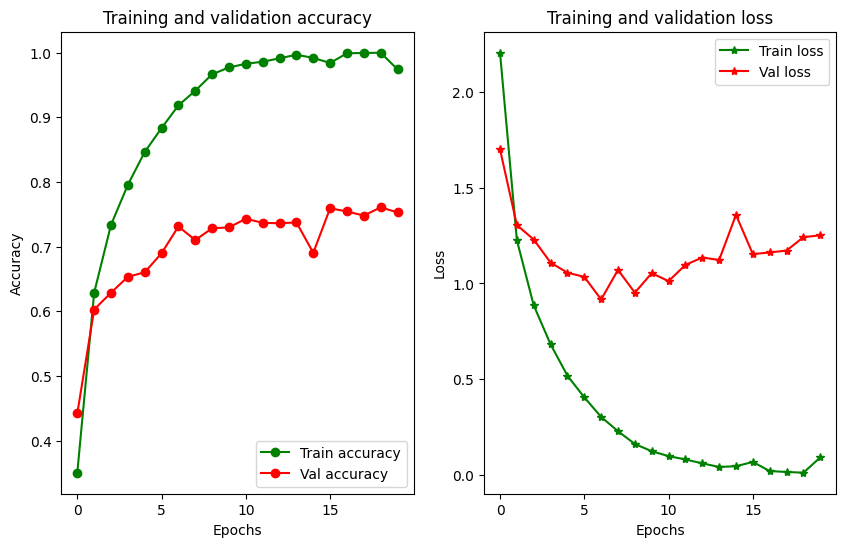

In [43]:
visualizacion_resultados(hist)

In [51]:
model_optimizer = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_optimizer.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
model_optimizer.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
hist_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 124s 543ms/step - accuracy: 0.1589 - loss: 2.8524 - val_accuracy: 0.4470 - val_loss: 1.7859
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.4562 - loss: 1.6685 - val_accuracy: 0.5579 - val_loss: 1.3898
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.5873 - loss: 1.2542 - val_accuracy: 0.6225 - val_loss: 1.2199
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.6594 - loss: 1.0274 - val_accuracy: 0.6737 - val_loss: 1.0411
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.7110 - loss: 0.8605 - val_accuracy: 0.6660 - val_loss: 1.0291
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - accuracy: 0.7637 - loss: 0.7100 - val_accuracy: 0.7221 - val_loss: 0.9262
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.7827 - loss: 0.6431 - val_accuracy: 0.7446 - val_loss: 0.8377
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8197 - loss: 0.5409 

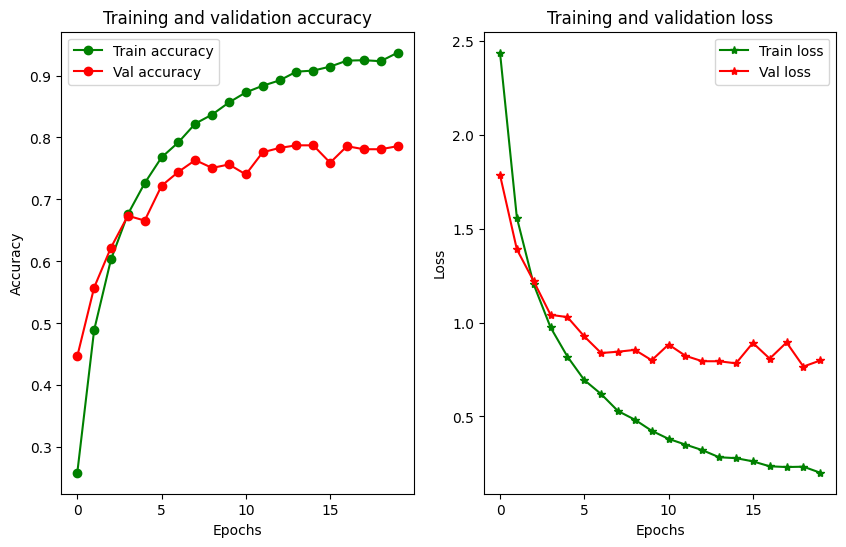

In [54]:
visualizacion_resultados(hist_optimizer)

In [55]:
model_convul = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_convul.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_convul.summary()

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
hist_convul = model_convul.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 124s 537ms/step - accuracy: 0.3090 - loss: 2.3504 - val_accuracy: 0.7572 - val_loss: 0.8001
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.8654 - loss: 0.4564 - val_accuracy: 0.8014 - val_loss: 0.6267
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9628 - loss: 0.1645 - val_accuracy: 0.8372 - val_loss: 0.6148
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9874 - loss: 0.0781 - val_accuracy: 0.8161 - val_loss: 0.6298
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9939 - loss: 0.0533 - val_accuracy: 0.8519 - val_loss: 0.6407
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9963 - loss: 0.0410 - val_accuracy: 0.8442 - val_loss: 0.6649
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9969 - loss: 0.0369 - val_accuracy: 0.8561 - val_loss: 0.6943
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9969 - loss: 0.0337 

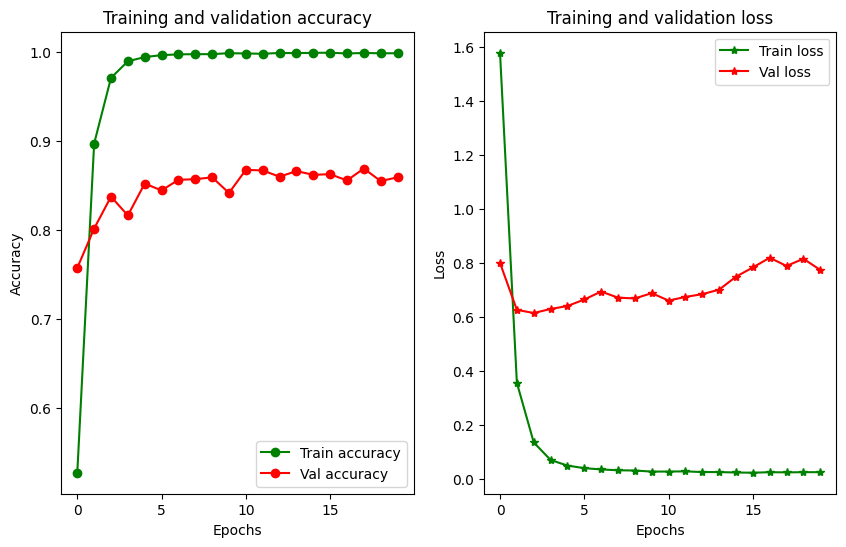

In [57]:
visualizacion_resultados(hist_convul)

In [58]:
model_callback = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_callback.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_callback.summary()

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            self.model.stop_training = True

In [61]:
callback = TrainingCallback()

In [63]:
hist_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks=[callback],
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 82s 356ms/step - accuracy: 0.2985 - loss: 2.3838 - val_accuracy: 0.7537 - val_loss: 0.7598
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.8671 - loss: 0.4363 - val_accuracy: 0.8084 - val_loss: 0.5685
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9689 - loss: 0.1449 - val_accuracy: 0.8428 - val_loss: 0.5280


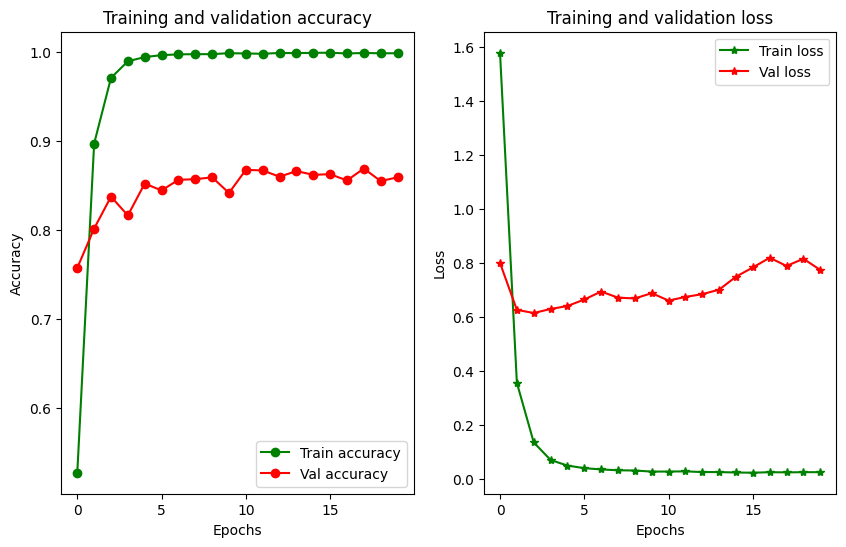

In [64]:
visualizacion_resultados(hist_convul)

In [67]:
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(clases), activation='softmax')
    ])
    return model

model_early = get_model()
model_early.summary()
model_early.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, mode='auto')

hist_early = model_early.fit(
    train_generator,
    epochs=20,
    callbacks=[callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 128s 589ms/step - accuracy: 0.2802 - loss: 2.4544 - val_accuracy: 0.7368 - val_loss: 0.8019
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.8419 - loss: 0.5126 - val_accuracy: 0.8028 - val_loss: 0.5844
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9507 - loss: 0.1928 - val_accuracy: 0.8295 - val_loss: 0.5858
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9813 - loss: 0.0942 - val_accuracy: 0.8386 - val_loss: 0.6059
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9895 - loss: 0.0638 - val_accuracy: 0.8618 - val_loss: 0.5550
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9941 - loss: 0.0481 - val_accuracy: 0.8379 - val_loss: 0.5911
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9944 - loss: 0.0423 - val_accuracy: 0.8512 - val_loss: 0.6332
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.9966 - loss: 0.0365 